In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
amirmohammadparvizi_thyroid_disease_detection_dataset_path = kagglehub.dataset_download('amirmohammadparvizi/thyroid-disease-detection-dataset')

print('Data source import complete.')


100%|██████████| 145k/145k [00:00<00:00, 41.0MB/s]

Extracting files...
Data source import complete.


In [ ]:
# Import Some Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Read CSV Data
data = pd.read_csv("/content/thyroidDF.csv")

In [ ]:
data.head(10)

age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick pregnant  \
0   29   F            f                  f                   f    f        f   
1   29   F            f                  f                   f    f        f   
2   41   F            f                  f                   f    f        f   
3   36   F            f                  f                   f    f        f   
4   32   F            f                  f                   f    f        f   
5   60   F            f                  f                   f    f        f   
6   77   F            f                  f                   f    f        f   
7   28   F            f                  f                   f    f        f   
8   28   F            f                  f                   f    f        f   
9   28   F            f                  f                   f    f        f   

  thyroid_surgery I131_treatment query_hypothyroid  ...    TT4 T4U_measured  \
0               f              f                 t  ...    NaN            f   
1               f              f                 f  ...  128.0            f   
2               f              f                 f  ...    NaN            f   
3               f              f                 f  ...    NaN            f   
4               f              f                 f  ...    NaN            f   
5               f              f                 f  ...    NaN            f   
6               f              f                 f  ...    NaN            f   
7               f              f                 f  ...  116.0            f   
8               f              f                 f  ...   76.0            f   
9               f              f                 f  ...   83.0            f   

  T4U FTI_measured FTI TBG_measured   TBG  referral_source target  patient_id  
0 NaN            f NaN            f   NaN            other      -   840801013  
1 NaN            f NaN            f   NaN            other      -   840801014  
2 NaN            f NaN            t  11.0            other      -   840801042  
3 NaN            f NaN            t  26.0            other      -   840803046  
4 NaN            f NaN            t  36.0            other      S   840803047  
5 NaN            f NaN            t  26.0            other      -   840803048  
6 NaN            f NaN            t  21.0            other      -   840803068  
7 NaN            f NaN            f   NaN              SVI      -   840807019  
8 NaN            f NaN            f   NaN            other      -   840808060  
9 NaN            f NaN            f   NaN            other      -   840808073  

[10 rows x 31 columns]

In [ ]:
# number of row's and col in data set
row,col=data.shape
print("Number of Row's in Data :",row)
print("Number of Col's in Data :",col)

Number of Row's in Data : 9172
Number of Col's in Data : 31


In [ ]:
# data duplicate
data.duplicated().sum()

np.int64(0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [ ]:
data.count()

age                    9172
sex                    8865
on_thyroxine           9172
query_on_thyroxine     9172
on_antithyroid_meds    9172
sick                   9172
pregnant               9172
thyroid_surgery        9172
I131_treatment         9172
query_hypothyroid      9172
query_hyperthyroid     9172
lithium                9172
goitre                 9172
tumor                  9172
hypopituitary          9172
psych                  9172
TSH_measured           9172
TSH                    8330
T3_measured            9172
T3                     6568
TT4_measured           9172
TT4                    8730
T4U_measured           9172
T4U                    8363
FTI_measured           9172
FTI                    8370
TBG_measured           9172
TBG                     349
referral_source        9172
target                 9172
patient_id             9172
dtype: int64

In [ ]:
data.describe()

age          TSH           T3          TT4          T4U  \
count   9172.000000  8330.000000  6568.000000  8730.000000  8363.000000   
mean      73.555822     5.218403     1.970629   108.700305     0.976056   
std     1183.976718    24.184006     0.887579    37.522670     0.200360   
min        1.000000     0.005000     0.050000     2.000000     0.170000   
25%       37.000000     0.460000     1.500000    87.000000     0.860000   
50%       55.000000     1.400000     1.900000   104.000000     0.960000   
75%       68.000000     2.700000     2.300000   126.000000     1.065000   
max    65526.000000   530.000000    18.000000   600.000000     2.330000   

               FTI         TBG    patient_id  
count  8370.000000  349.000000  9.172000e+03  
mean    113.640746   29.870057  8.529473e+08  
std      41.551650   21.080504  7.581969e+06  
min       1.400000    0.100000  8.408010e+08  
25%      93.000000   21.000000  8.504090e+08  
50%     109.000000   26.000000  8.510040e+08  
75%     128.000000   31.000000  8.607110e+08  
max     881.000000  200.000000  8.701190e+08

#### **Data Cleaning 🧹**



In [ ]:
# missing data
data.isna().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

In [ ]:
data.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

In [ ]:
data['TBG_measured']

0       f
1       f
2       t
3       t
4       t
       ..
9167    f
9168    f
9169    f
9170    f
9171    f
Name: TBG_measured, Length: 9172, dtype: object

In [ ]:
# whether TBG was measured in the blood
data['TBG_measured'].value_counts()

TBG_measured
f    8823
t     349
Name: count, dtype: int64

In [ ]:
# drop TBG Column
data.drop(columns=['TBG','patient_id'],inplace=True)

In [ ]:
# Randomly assign mean values to the some missing missing entries in the dataset
# 2604 Is missing entries in T3 column
Random_AVG_T3 = np.random.uniform(data['T3'].mean() - data['T3'].std(), data['T3'].mean() + data['T3'].std(), 2604)
# 809 Is missing entries in T4U column
Random_AVG_T4U = np.random.uniform(data['T4U'].mean() - data['T4U'].std(), data['T4U'].mean() + data['T4U'].std(), 809)
# 842 Is missing entries in TSH column
Random_AVG_TSH = np.random.uniform(data['TSH'].mean() - data['TSH'].std(), data['TSH'].mean() + data['TSH'].std(), 842)
# 442 Is missing entries in TT4 column
Random_AVG_TT4 = np.random.uniform(data['TT4'].mean() - data['TT4'].std(), data['TT4'].mean() + data['TT4'].std(), 442)
# 802 Is missing entries in FTI column
Random_AVG_FTI = np.random.uniform(data['FTI'].mean() - data['FTI'].std(), data['FTI'].mean() + data['FTI'].std(), 802)

In [ ]:
# Insert Random value in dataset column T3
data['T3'][data['T3'].isnull()]=Random_AVG_T3

# Insert Random value in dataset column T4U
data['T4U'][data['T4U'].isnull()]=Random_AVG_T4U

# Insert Random value in dataset column T4U
data['TSH'][data['TSH'].isnull()]=Random_AVG_TSH

# Insert Random value in dataset column TT4
data['TT4'][data['TT4'].isnull()]=Random_AVG_TT4

# Insert Random value in dataset column FTI
data['FTI'][data['FTI'].isnull()]=Random_AVG_FTI

In [ ]:
# drop missing Entites of sex (Because their one pregnant column also their )
data.dropna(inplace=True)

In [ ]:
female,male=data['sex'].value_counts()

print('Total Male   : {}'.format(male))
print('Total Female : {}'.format(female))


Total Male   : 2792
Total Female : 6073


In [ ]:
# number of row's and col in data set
row,col=data.shape
print("Number of Row's in Data :",row)
print("Number of Col's in Data :",col)

Number of Row's in Data : 8865
Number of Col's in Data : 29


In [ ]:
# Different refferral sources
data['referral_source'].value_counts()

referral_source
other    5294
SVI      2338
SVHC      927
STMW      235
SVHD       68
WEST        3
Name: count, dtype: int64

#### **Some Bool Column in dataset**
- **T : True**
- **F : False**

In [ ]:
# whether TBG was measured in the blood
data['TBG_measured'].value_counts()

TBG_measured
f    8534
t     331
Name: count, dtype: int64

In [ ]:
# on_thyroxine - whether patient is on thyroxine
data['on_thyroxine'].value_counts()

on_thyroxine
f    7646
t    1219
Name: count, dtype: int64

In [ ]:
# query on thyroxine - *whether patient is on thyroxine
data['query_on_thyroxine'].value_counts()

query_on_thyroxine
f    8714
t     151
Name: count, dtype: int64

In [ ]:
# on antithyroid meds - whether patient is on antithyroid meds
data['on_antithyroid_meds'].value_counts()

on_antithyroid_meds
f    8749
t     116
Name: count, dtype: int64

In [ ]:
# sick - whether patient is sick
data['sick'].value_counts()

sick
f    8531
t     334
Name: count, dtype: int64

In [ ]:
# pregnant - whether patient is pregnant
data['pregnant'].value_counts()

pregnant
f    8762
t     103
Name: count, dtype: int64

In [ ]:
# thyroid_surgery - whether patient has undergone thyroid surgery
data['thyroid_surgery'].value_counts()

thyroid_surgery
f    8734
t     131
Name: count, dtype: int64

In [ ]:
# I131_treatment - whether patient is undergoing I131 treatment
data['I131_treatment'].value_counts()

I131_treatment
f    8701
t     164
Name: count, dtype: int64

In [ ]:
# query_hypothyroid - whether patient believes they have hypothyroid
data['query_hypothyroid'].value_counts()

query_hypothyroid
f    8247
t     618
Name: count, dtype: int64

In [ ]:
# query_hyperthyroid - whether patient believes they have hyperthyroid
data['query_hyperthyroid'].value_counts()

query_hyperthyroid
f    8227
t     638
Name: count, dtype: int64

In [ ]:
# lithium - whether patient * lithium
data['lithium'].value_counts()

lithium
f    8775
t      90
Name: count, dtype: int64

In [ ]:
# goitre - whether patient has goitre
data['goitre'].value_counts()

goitre
f    8781
t      84
Name: count, dtype: int64

In [ ]:
# tumor - whether patient has tumor
data['tumor'].value_counts()

tumor
f    8629
t     236
Name: count, dtype: int64

In [ ]:
# psych - whether patient * psych
data['psych'].value_counts()

psych
f    8459
t     406
Name: count, dtype: int64

In [ ]:
# T3_measured - whether T3 was measured in the blood
data['T3_measured'].value_counts()

T3_measured
t    6344
f    2521
Name: count, dtype: int64

In [ ]:
# TT4_measured - whether TT4 was measured in the blood
data['TT4_measured'].value_counts()

TT4_measured
t    8445
f     420
Name: count, dtype: int64

In [ ]:
# T4U_measured - whether T4U was measured in the blood
data['T4U_measured'].value_counts()

T4U_measured
t    8090
f     775
Name: count, dtype: int64

In [ ]:
# FTI_measured - whether FTI was measured in the blood
data['FTI_measured'].value_counts()

FTI_measured
t    8097
f     768
Name: count, dtype: int64

In [ ]:
data.describe(include='O').T

count unique    top  freq
sex                  8865      2      F  6073
on_thyroxine         8865      2      f  7646
query_on_thyroxine   8865      2      f  8714
on_antithyroid_meds  8865      2      f  8749
sick                 8865      2      f  8531
pregnant             8865      2      f  8762
thyroid_surgery      8865      2      f  8734
I131_treatment       8865      2      f  8701
query_hypothyroid    8865      2      f  8247
query_hyperthyroid   8865      2      f  8227
lithium              8865      2      f  8775
goitre               8865      2      f  8781
tumor                8865      2      f  8629
hypopituitary        8865      2      f  8863
psych                8865      2      f  8459
TSH_measured         8865      2      t  8052
T3_measured          8865      2      t  6344
TT4_measured         8865      2      t  8445
T4U_measured         8865      2      t  8090
FTI_measured         8865      2      t  8097
TBG_measured         8865      2      f  8534
referral_source      8865      6  other  5294
target               8865     32      -  6559

In [ ]:
data.describe()

age          TSH           T3          TT4          T4U  \
count   8865.000000  8865.000000  8865.000000  8865.000000  8865.000000   
mean      74.363113     5.163964     1.961542   108.616836     0.977428   
std     1204.292368    23.186407     0.789518    36.772919     0.191898   
min        1.000000   -18.953679     0.050000     2.000000     0.170000   
25%       37.000000     0.400000     1.500000    87.350141     0.860000   
50%       55.000000     1.400000     1.900000   104.000000     0.960000   
75%       68.000000     3.000000     2.312174   126.000000     1.070000   
max    65526.000000   530.000000    18.000000   600.000000     2.330000   

               FTI  
count  8865.000000  
mean    112.931311  
std      36.286301  
min       1.400000  
25%      93.000000  
50%     109.000000  
75%     129.000000  
max     642.000000

In [ ]:
data['TSH'].head(200)

0       0.300000
1       1.600000
2      -4.878959
3      16.060242
4       8.209868
         ...    
198     0.250000
199     0.250000
200     1.700000
201     0.100000
202     0.100000
Name: TSH, Length: 200, dtype: float64

## **Detecting outliers**



In [ ]:
# Handel Outliers of age column
data = data[data['age']<(data['age'].mean() + 3*data['age'].std())]
data = data[data['TSH']<(data['TSH'].mean() + 3*data['TSH'].std())]
data = data[data['T3']<(data['T3'].mean() + 3*data['T3'].std())]
data = data[data['TT4']<(data['TT4'].mean() + 3*data['TT4'].std())]
data = data[data['T4U']<(data['T4U'].mean() + 3*data['T4U'].std())]
data = data[data['FTI']<(data['FTI'].mean() + 3*data['FTI'].std())]

data = data[data['age'] <= 100]

In [ ]:
data['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'L', 'Q', 'J',
       'O', 'LJ', 'H|K', 'GK', 'C|I', 'A', 'KJ', 'P', 'FK', 'B', 'MK',
       'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [ ]:
# mapping for target variable
map = {'-':"Negative",'A':'Hyperthyroid','AK':"Hyperthyroid", 'B':"Hyperthyroid",
           'C':"Hyperthyroid", 'C|I': 'Hyperthyroid', 'D':"Hyperthyroid",
           'D|R':"Hyperthyroid", 'E': "Hypothyroid",'F': "Hypothyroid",
           'FK': "Hypothyroid", "G": "Hypothyroid", "GK": "Hypothyroid",
           "GI": "Hypothyroid", 'GKJ': 'Hypothyroid', 'H|K': 'Hypothyroid',
          }

In [ ]:
data['target'] = data['target'].map(map)
data.dropna(subset=['target'], inplace=True)

In [ ]:
data['target'].unique()

array(['Negative', 'Hypothyroid', 'Hyperthyroid'], dtype=object)

In [ ]:
data.dropna()

age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick  \
0      29   F            f                  f                   f    f   
1      29   F            f                  f                   f    f   
2      41   F            f                  f                   f    f   
3      36   F            f                  f                   f    f   
5      60   F            f                  f                   f    f   
...   ...  ..          ...                ...                 ...  ...   
9166   70   F            f                  f                   f    f   
9167   56   M            f                  f                   f    f   
9168   22   M            f                  f                   f    f   
9170   47   F            f                  f                   f    f   
9171   31   M            f                  f                   f    f   

     pregnant thyroid_surgery I131_treatment query_hypothyroid  ...        T3  \
0           f               f              f                 t  ...  1.677980   
1           f               f              f                 f  ...  1.900000   
2           f               f              f                 f  ...  1.516219   
3           f               f              f                 f  ...  1.962457   
5           f               f              f                 f  ...  2.852502   
...       ...             ...            ...               ...  ...       ...   
9166        f               f              f                 f  ...  2.031309   
9167        f               f              f                 f  ...  2.008589   
9168        f               f              f                 f  ...  1.531860   
9170        f               f              f                 f  ...  1.866249   
9171        f               f              f                 t  ...  2.772106   

     TT4_measured         TT4 T4U_measured       T4U FTI_measured         FTI  \
0               f  129.219635            f  1.071559            f  131.278993   
1               t  128.000000            f  0.974632            f  123.778919   
2               f  115.681646            f  1.103839            f  119.640371   
3               f   81.525976            f  0.990363            f  140.375236   
5               f   78.558948            f  0.842965            f  121.466262   
...           ...         ...          ...       ...          ...         ...   
9166            t   88.000000            t  0.740000            t  119.000000   
9167            t   64.000000            t  0.830000            t   77.000000   
9168            t   91.000000            t  0.920000            t   99.000000   
9170            t   75.000000            t  0.850000            t   88.000000   
9171            t   66.000000            t  1.020000            t   65.000000   

      TBG_measured referral_source    target  
0                f           other  Negative  
1                f           other  Negative  
2                t           other  Negative  
3                t           other  Negative  
5                t           other  Negative  
...            ...             ...       ...  
9166             f             SVI  Negative  
9167             f             SVI  Negative  
9168             f             SVI  Negative  
9170             f           other  Negative  
9171             f           other  Negative  

[7131 rows x 29 columns]

#### **Data Visualization 🎨**



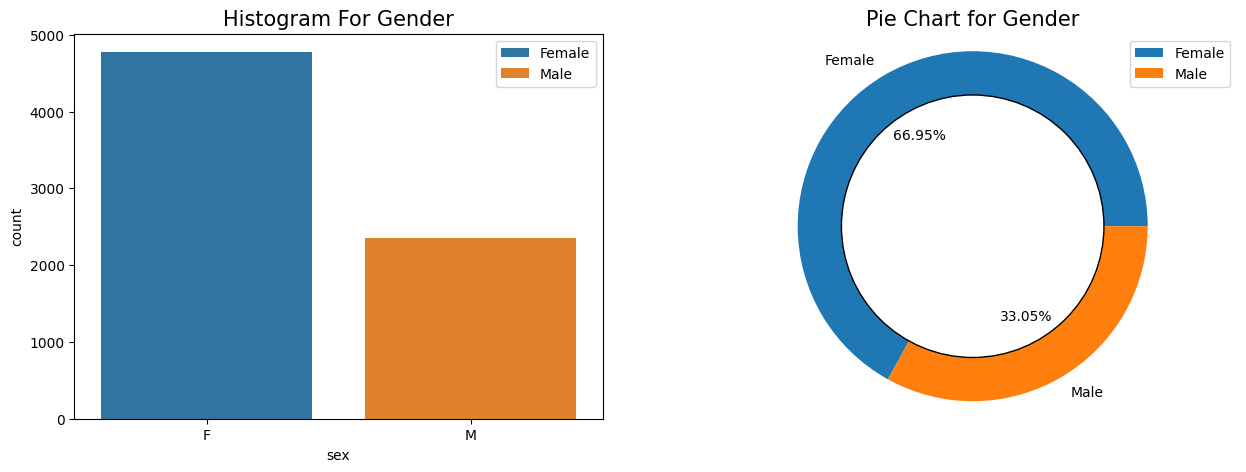

In [ ]:
# Plotting For Gender

labels = ['Female', 'Male']
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.countplot(data=data, x='sex', hue='sex', alpha=1)
plt.legend(labels)
plt.title('Histogram For Gender',size=15)

plt.subplot(1, 2, 2)
female, male = data['sex'].value_counts()
y = [female, male]
explode = [0, 0.0]
labels = ['Female', 'Male']
plt.pie(y, labels=labels, explode=explode,autopct='%.2f%%')
plt.axis('equal')
plt.legend(labels)
circle = plt.Circle(xy=(0, 0), radius=0.75, facecolor='White', edgecolor='black')
plt.gca().add_artist(circle)
plt.title('Pie Chart for Gender', size=15)
plt.show()


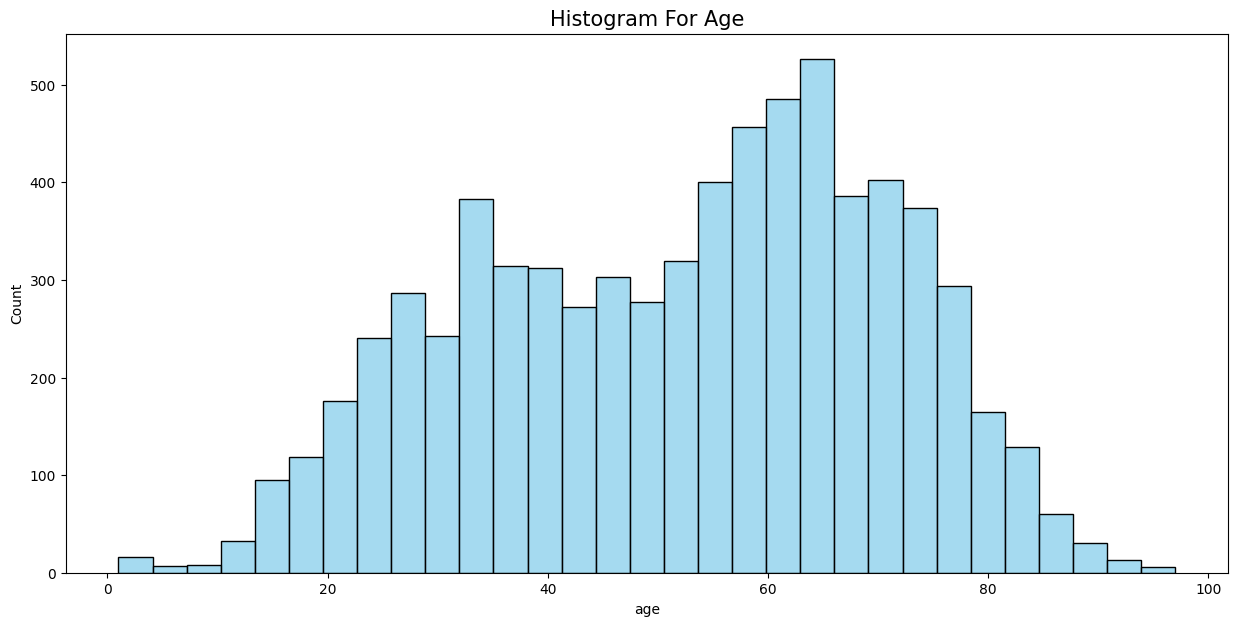

In [ ]:
plt.figure(figsize=(15,7))
sns.histplot(data['age'],kde=False,color='skyblue')
plt.title('Histogram For Age', size=15)
plt.show()

In [ ]:
data['target'].value_counts()

target
Negative        6483
Hypothyroid      547
Hyperthyroid     101
Name: count, dtype: int64

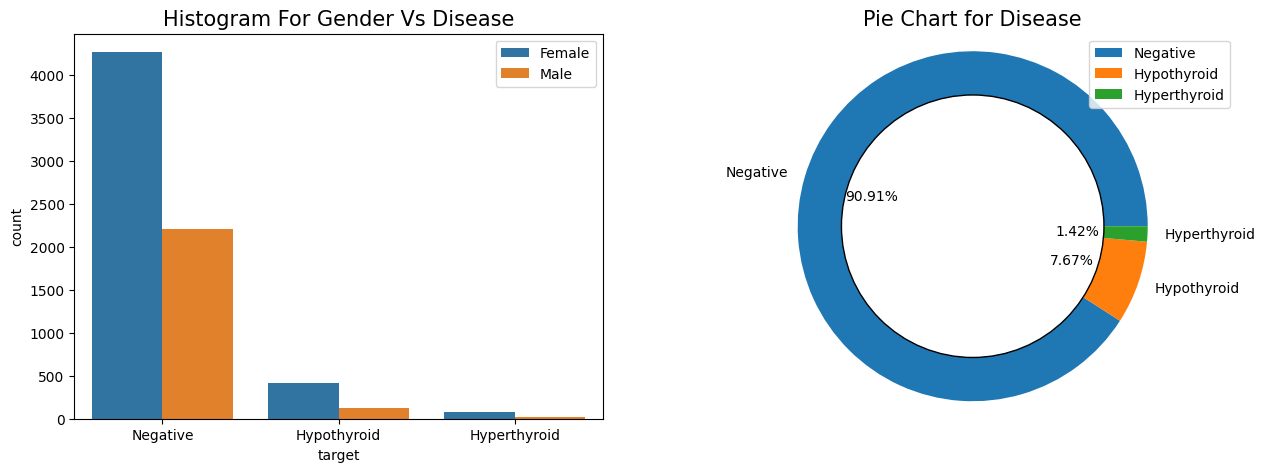

In [ ]:
# Plotting For Gender

labels = ['Female','Male']
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.countplot(data=data, x='target', hue='sex', alpha=1)
plt.legend(labels)
plt.title('Histogram For Gender Vs Disease',size=15)

plt.subplot(1, 2, 2)
Negative,Hypothyroid,Hyperthyroid = data['target'].value_counts()
y = [Negative,Hypothyroid,Hyperthyroid]
explode = [0, 0.0,0]
labels = ['Negative', 'Hypothyroid','Hyperthyroid']
plt.pie(y, labels=labels, explode=explode,autopct='%.2f%%')
plt.axis('equal')
plt.legend(labels)
circle = plt.Circle(xy=(0, 0), radius=0.75, facecolor='White', edgecolor='black')
plt.gca().add_artist(circle)
plt.title('Pie Chart for Disease', size=15)
plt.show()


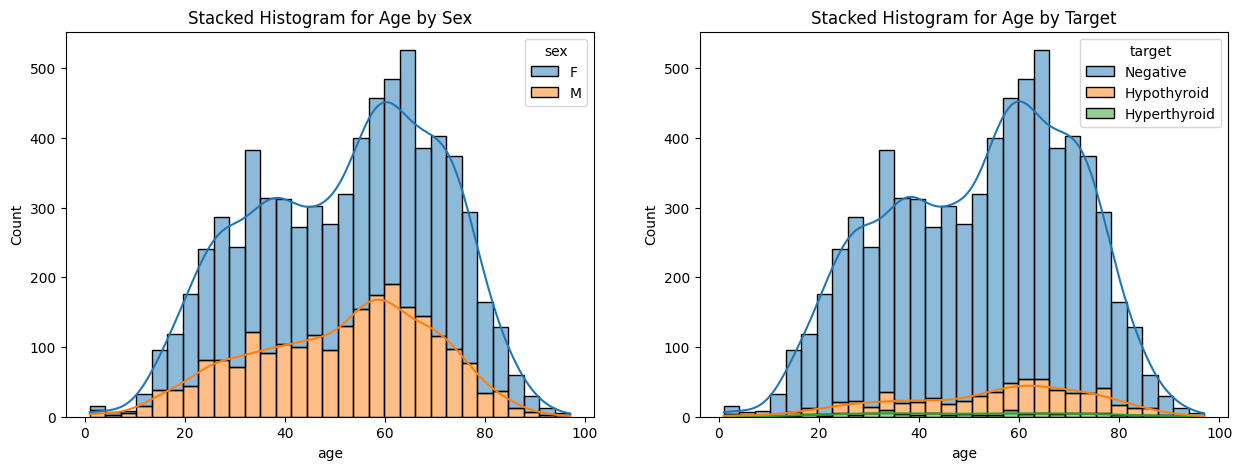

In [ ]:
# Stacked Histogram
plt.figure(figsize=(15,5))

# Subplot 1
plt.subplot(1, 2, 1)
sns.histplot(data=data, x="age", hue="sex", multiple="stack", kde=True)
plt.title('Stacked Histogram for Age by Sex')

# Subplot 2
plt.subplot(1, 2, 2)
sns.histplot(data=data, x="age", hue="target", multiple="stack", kde=True)
plt.title('Stacked Histogram for Age by Target')

plt.show()


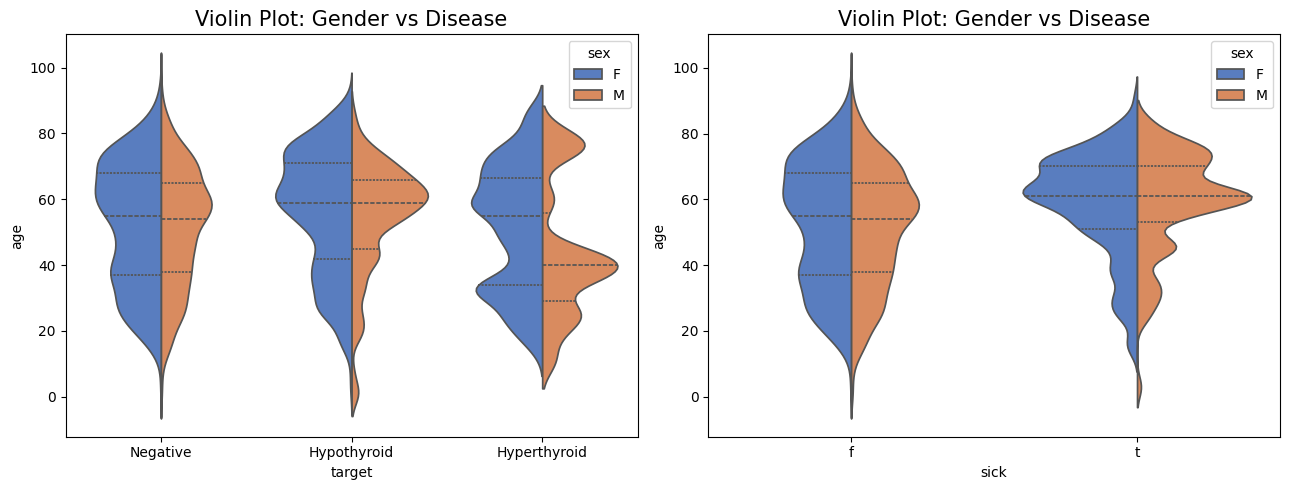

In [ ]:

plt.figure(figsize=(13, 5))

# Subplot 1
plt.subplot(1, 2, 1)
sns.violinplot(data=data, x="target", y="age", hue="sex", split=True, bw=.2, inner="quart", palette="muted")
plt.title('Violin Plot: Gender vs Disease', size=15)

# Subplot 2
plt.subplot(1, 2, 2)
sns.violinplot(data=data, x="sick", y="age", hue="sex", split=True, bw=.2, inner="quart", palette="muted")
plt.title('Violin Plot: Gender vs Disease', size=15)

plt.tight_layout()
plt.show()


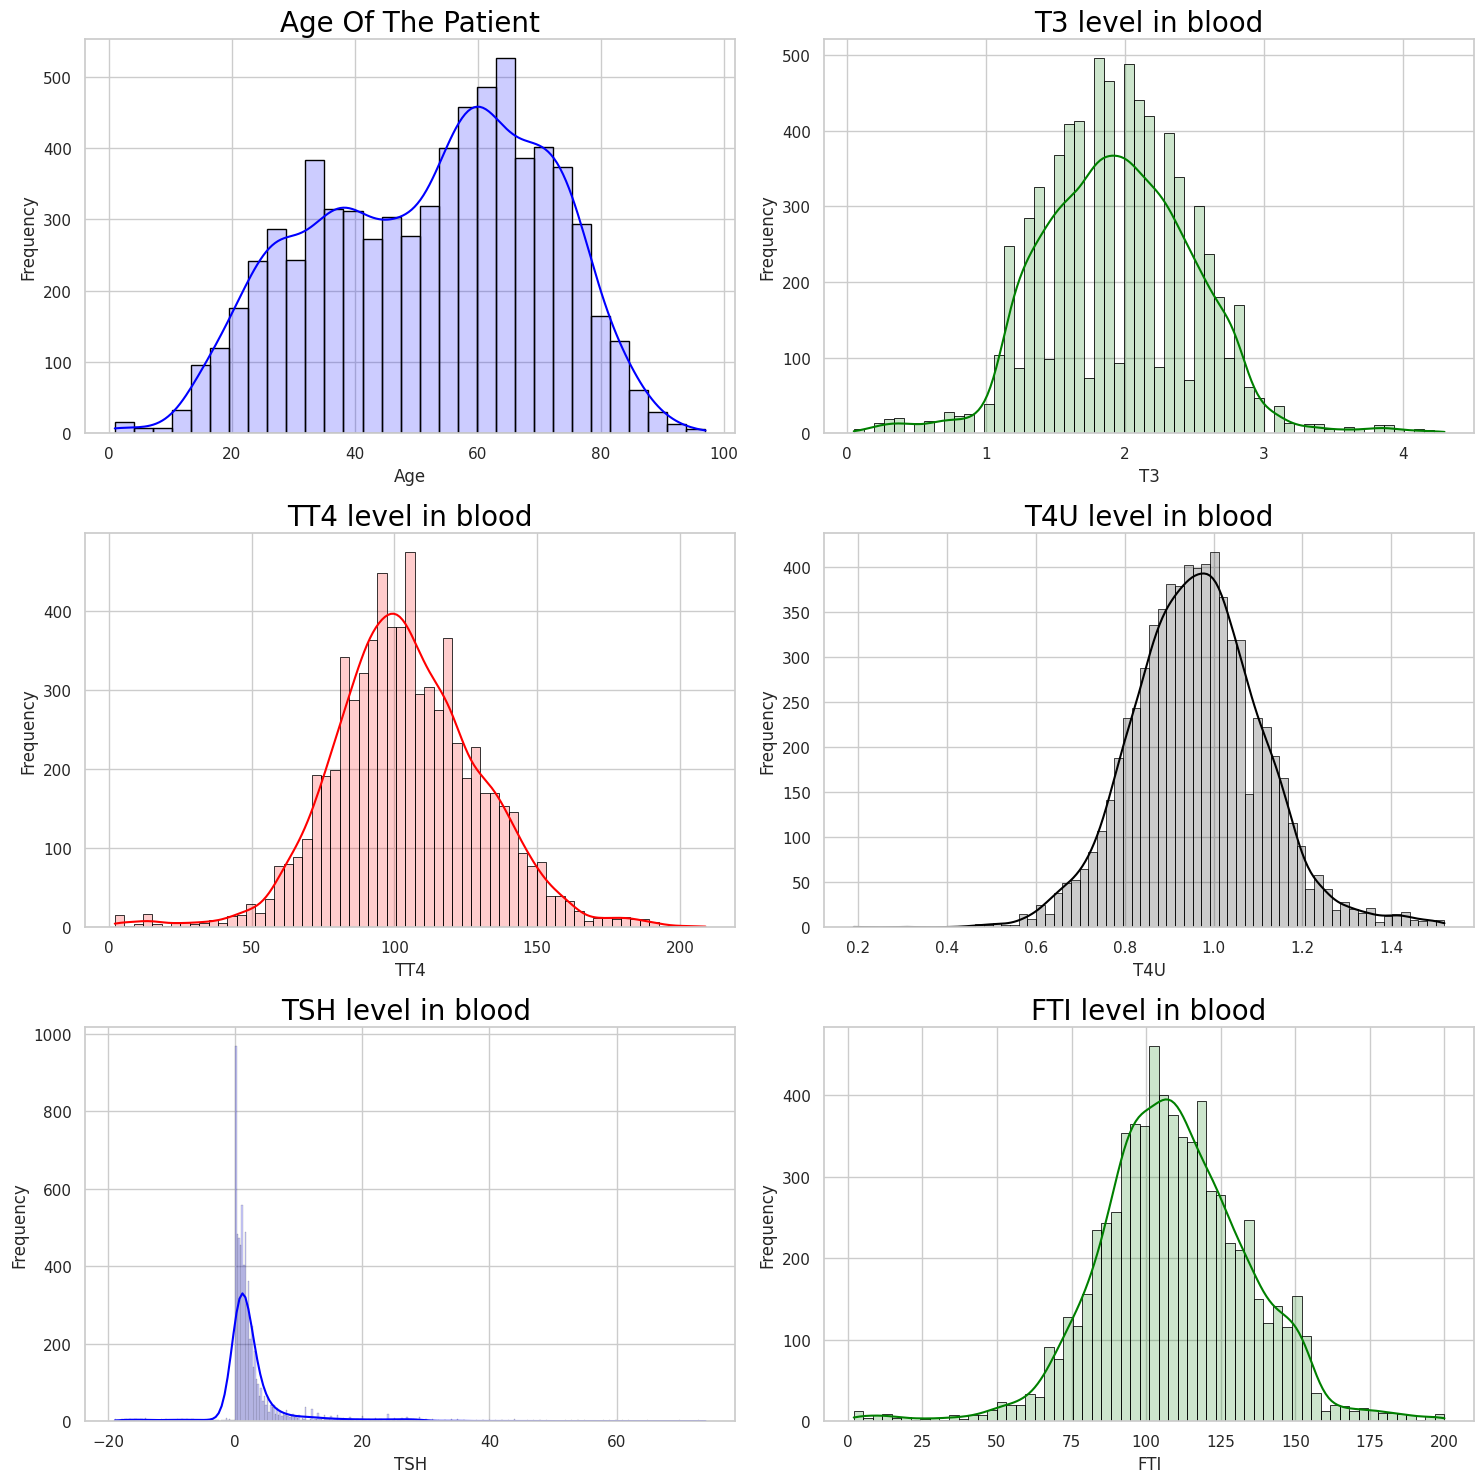

In [ ]:
plt.figure(figsize=(15,15))
sns.set(style='whitegrid')


plt.subplot(3, 2, 1)
sns.histplot(data['age'], kde=True, color='blue', edgecolor='black',alpha=0.2)
plt.title('Age Of The Patient', color='black', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(3, 2, 2)
sns.histplot(data['T3'], kde=True, color='green', edgecolor='black',alpha=0.2)
plt.title('T3 level in blood', color='black', fontsize=20)
plt.xlabel('T3')
plt.ylabel('Frequency')

plt.subplot(3, 2, 3)
sns.histplot(data['TT4'], kde=True, color='red', edgecolor='black',alpha=0.2)
plt.title('TT4 level in blood', color='black', fontsize=20)
plt.xlabel('TT4')
plt.ylabel('Frequency')

plt.subplot(3, 2, 4)
sns.histplot(data['T4U'], kde=True, color='black', edgecolor='black',alpha=0.2)
plt.title('T4U level in blood', color='black', fontsize=20)
plt.xlabel('T4U')
plt.ylabel('Frequency')

plt.subplot(3, 2, 5)
sns.histplot(data['TSH'], kde=True, color='blue', edgecolor='black',alpha=0.2)
plt.title('TSH level in blood ', color='black', fontsize=20)
plt.xlabel('TSH')
plt.ylabel('Frequency')

plt.subplot(3, 2, 6)
sns.histplot(data['FTI'], kde=True, color='green', edgecolor='black',alpha=0.2)
plt.title('FTI level in blood', color='black', fontsize=20)
plt.xlabel('FTI')
plt.ylabel('Frequency')



plt.tight_layout()
plt.show()

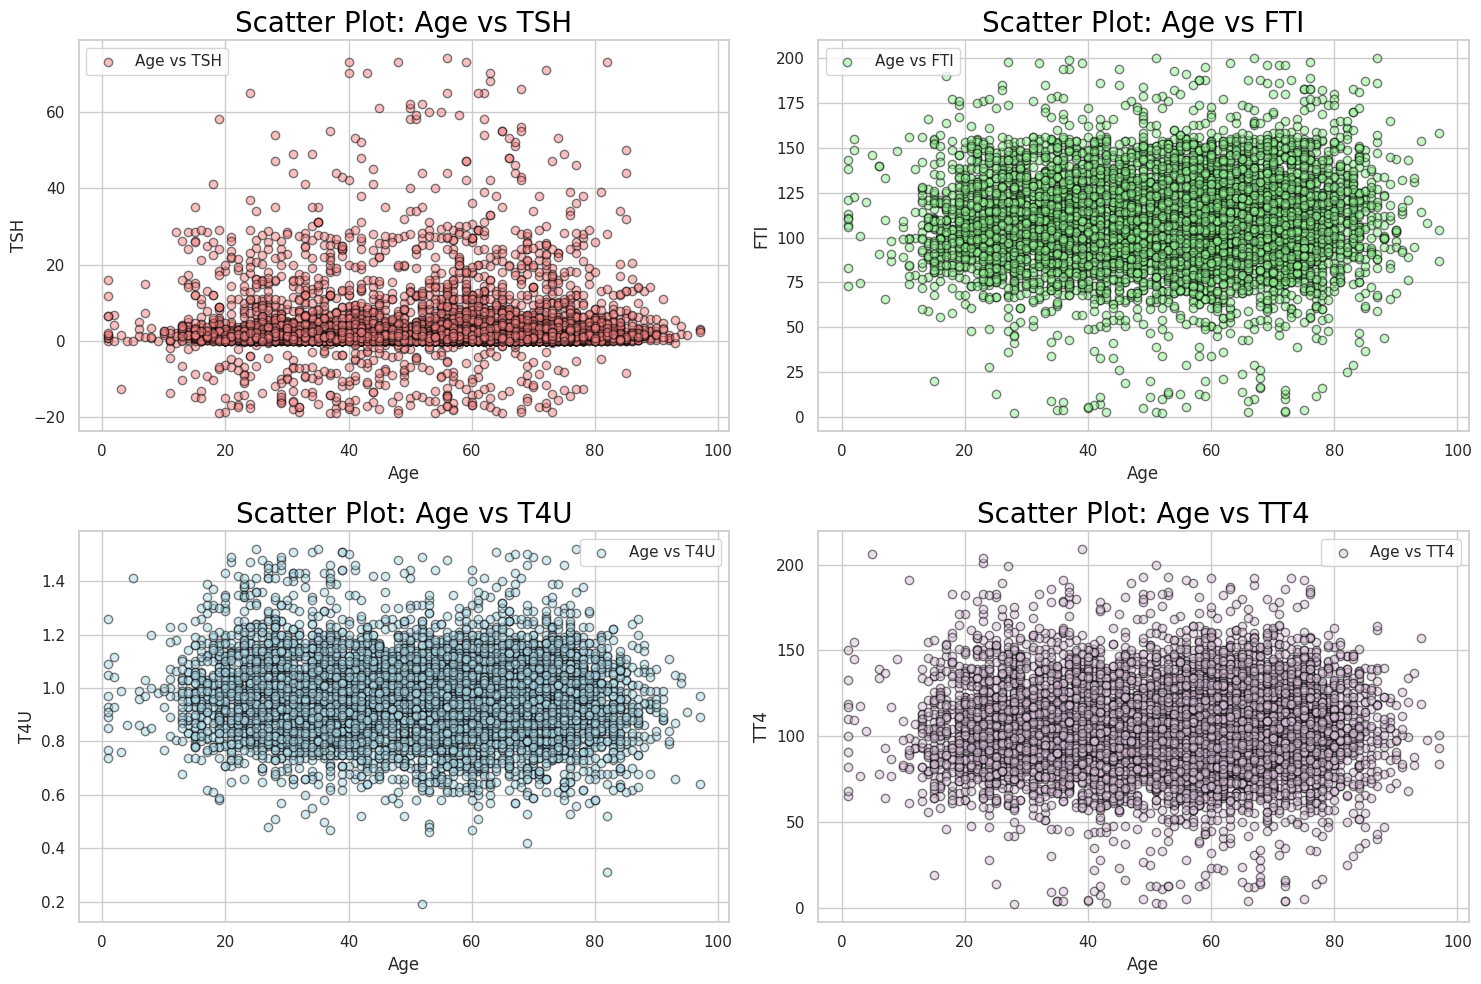

In [ ]:
import matplotlib.pyplot as plt

columns_to_plot = ['TSH', 'FTI', 'T4U', 'TT4']

plt.figure(figsize=(15, 10))

light_colors = ['lightcoral', 'lightgreen', 'lightblue', 'thistle']

for i, (column, color) in enumerate(zip(columns_to_plot, light_colors), start=1):
    plt.subplot(2, 2, i)
    plt.scatter(data['age'], data[column], label=f'Age vs {column}', color=color, edgecolors='black', linewidth=1, alpha=0.5)
    plt.xlabel('Age')
    plt.ylabel(column)
    plt.title(f'Scatter Plot: Age vs {column}', color='black', fontsize=20)
    plt.legend()
plt.tight_layout()

plt.show()



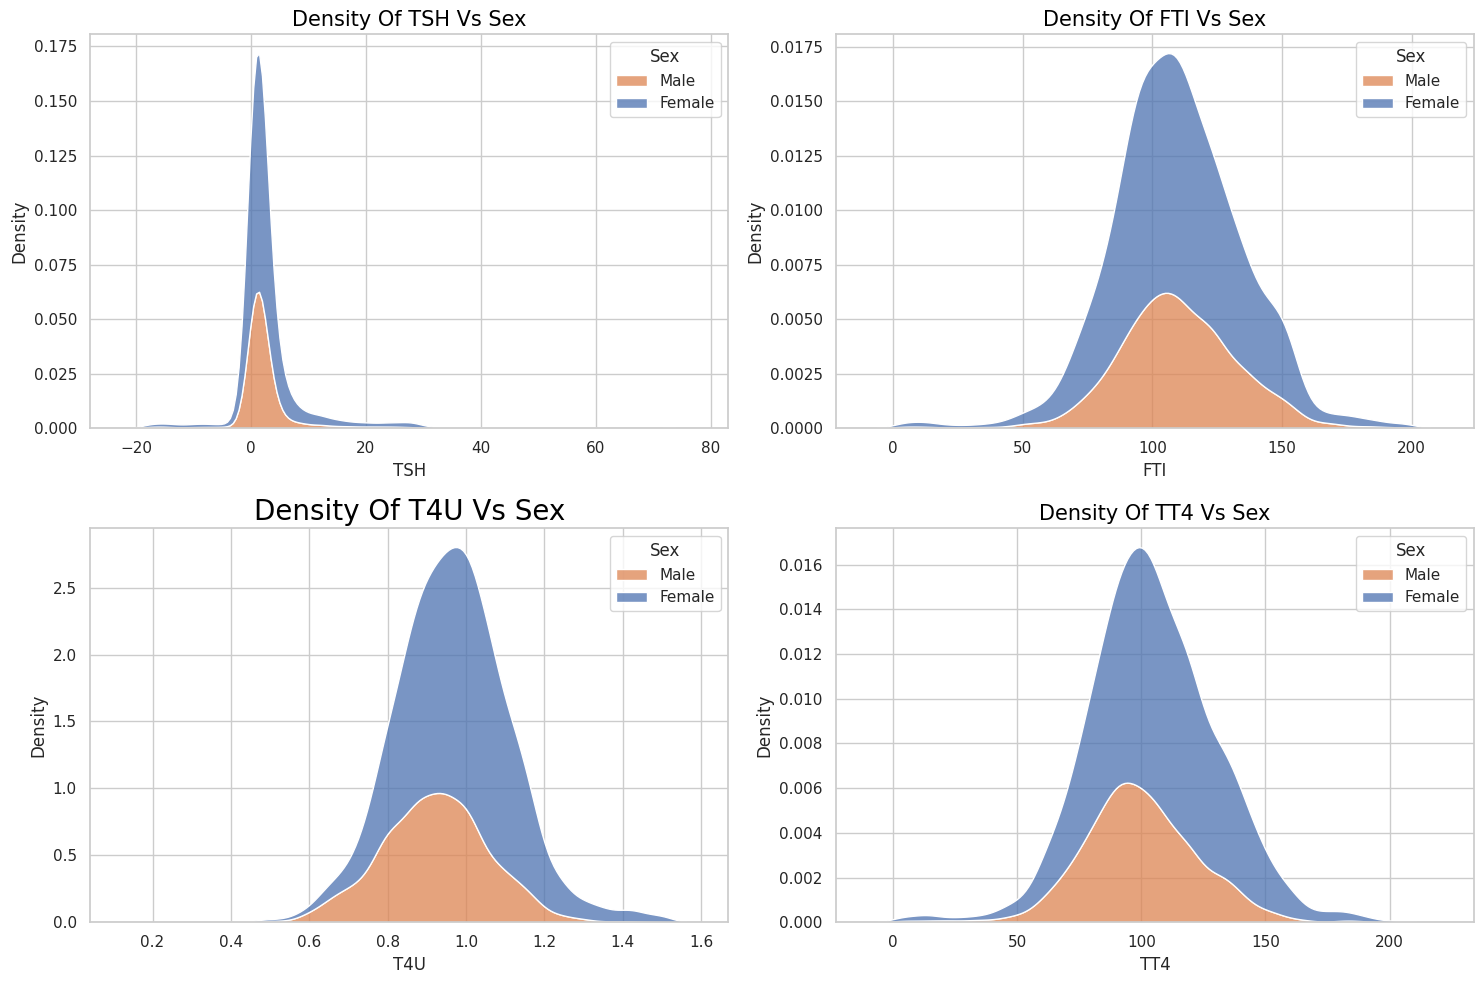

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.set(style='whitegrid')

plt.subplot(2, 2, 1)
sns.kdeplot(data=data, x="TSH", hue="sex", multiple="stack", fill=True)
plt.title("Density Of TSH Vs Sex", fontsize=15, color='black')
plt.legend(title='Sex', labels=['Male', 'Female'])

plt.subplot(2, 2, 2)
sns.kdeplot(data=data, x='FTI', hue="sex", multiple="stack", fill=True)
plt.title("Density Of FTI Vs Sex", fontsize=15, color='black')
plt.legend(title='Sex', labels=['Male', 'Female'])

plt.subplot(2, 2, 3)
sns.kdeplot(data=data, x='T4U', hue="sex", multiple="stack", fill=True)
plt.title("Density Of T4U Vs Sex", fontsize=20, color='black')
plt.legend(title='Sex', labels=['Male', 'Female'])

plt.subplot(2, 2, 4)
sns.kdeplot(data=data, x="TT4", hue="sex", multiple="stack", fill=True)
plt.title("Density Of TT4 Vs Sex", fontsize=15, color='black')
plt.legend(title='Sex', labels=['Male', 'Female'])

plt.tight_layout()
plt.show()


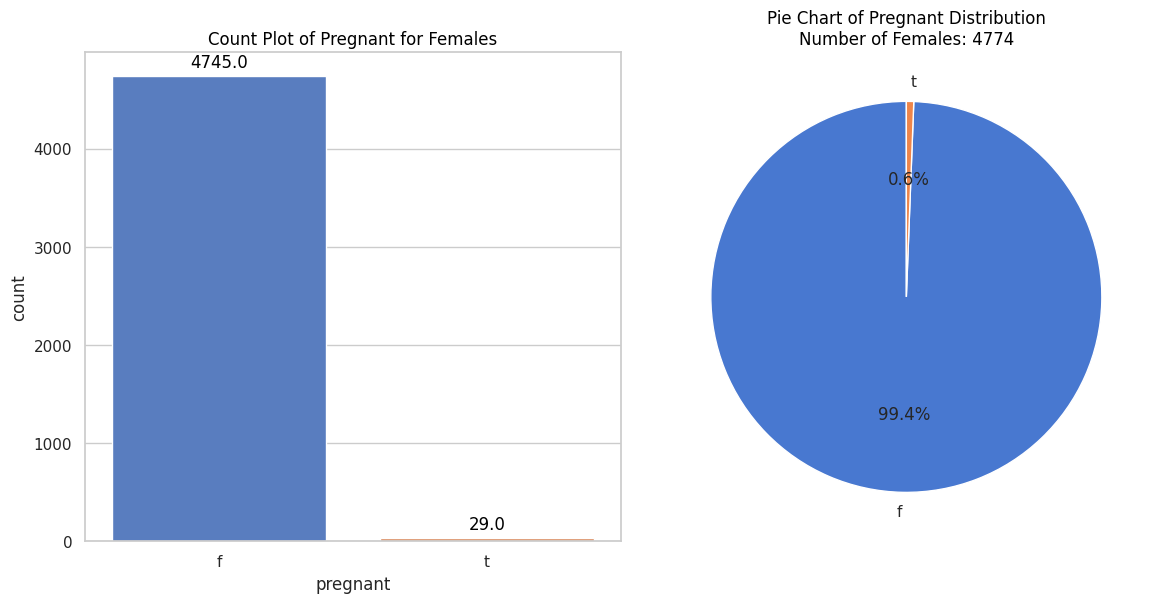

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
female_data = data[data['sex'] == 'F']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Count plot on the left side
sns.countplot(x='pregnant', data=female_data, palette='muted', ax=axes[0])
axes[0].set_title('Count Plot of Pregnant for Females',color='black')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='black')

# Pie chart on the right side
pregnant_counts = female_data['pregnant'].value_counts()
axes[1].pie(pregnant_counts, labels=pregnant_counts.index, autopct='%1.1f%%', colors=sns.color_palette('muted'), startangle=90)
axes[1].set_title('Pie Chart of Pregnant Distribution\nNumber of Females: {}'.format(len(female_data)),color='black')

plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px
fig1 = px.scatter(data, x='age', y='T3', color='target', color_discrete_map={'Hypothyroid': '#4b9546', 'Hyperthyroid': '#F65366', 'Negative': '#3498db'})

fig1.show()


In [ ]:
fig1 = px.scatter(data, x='age', y='FTI', color='target', color_discrete_map={'Hypothyroid': '#4b9546', 'Hyperthyroid': '#F65366', 'Negative': '#3498db'})
fig1.show()



In [ ]:

fig1 = px.scatter(data, x='age', y='T4U', color='target', color_discrete_map={'Hypothyroid': '#4b9546', 'Hyperthyroid': '#F65366', 'Negative': '#3498db'})
fig1.show()

In [ ]:

fig1 = px.scatter(data, x='age', y='TT4', color='target', color_discrete_map={'Hypothyroid': '#4b9546', 'Hyperthyroid': '#F65366', 'Negative': '#3498db'})

fig1.show()


In [ ]:
import plotly.express as px

# Assuming data is your DataFrame
fig = px.scatter_3d(data, x='T4U', y='T3', z='TSH', color='target',
                    color_discrete_map={'Hypothyroid': '#4b9546', 'Hyperthyroid': '#F65366', 'Negative': '#3498db'},
                    size='age', opacity=0.7, hover_data=['age', 'target'])

# Set the layout to make it full page
fig.update_layout(width=800, height=800)

# Show the plot
fig.show()


In [ ]:
fig4 = px.violin(data, x='sex', y='age', color='target', points='all', facet_col='target', height=700,
                color_discrete_map={'Hypothyroid': '#4b9546', 'Hyperthyroid': '#F65366', 'Negative': '#3498db'})
fig4.show()


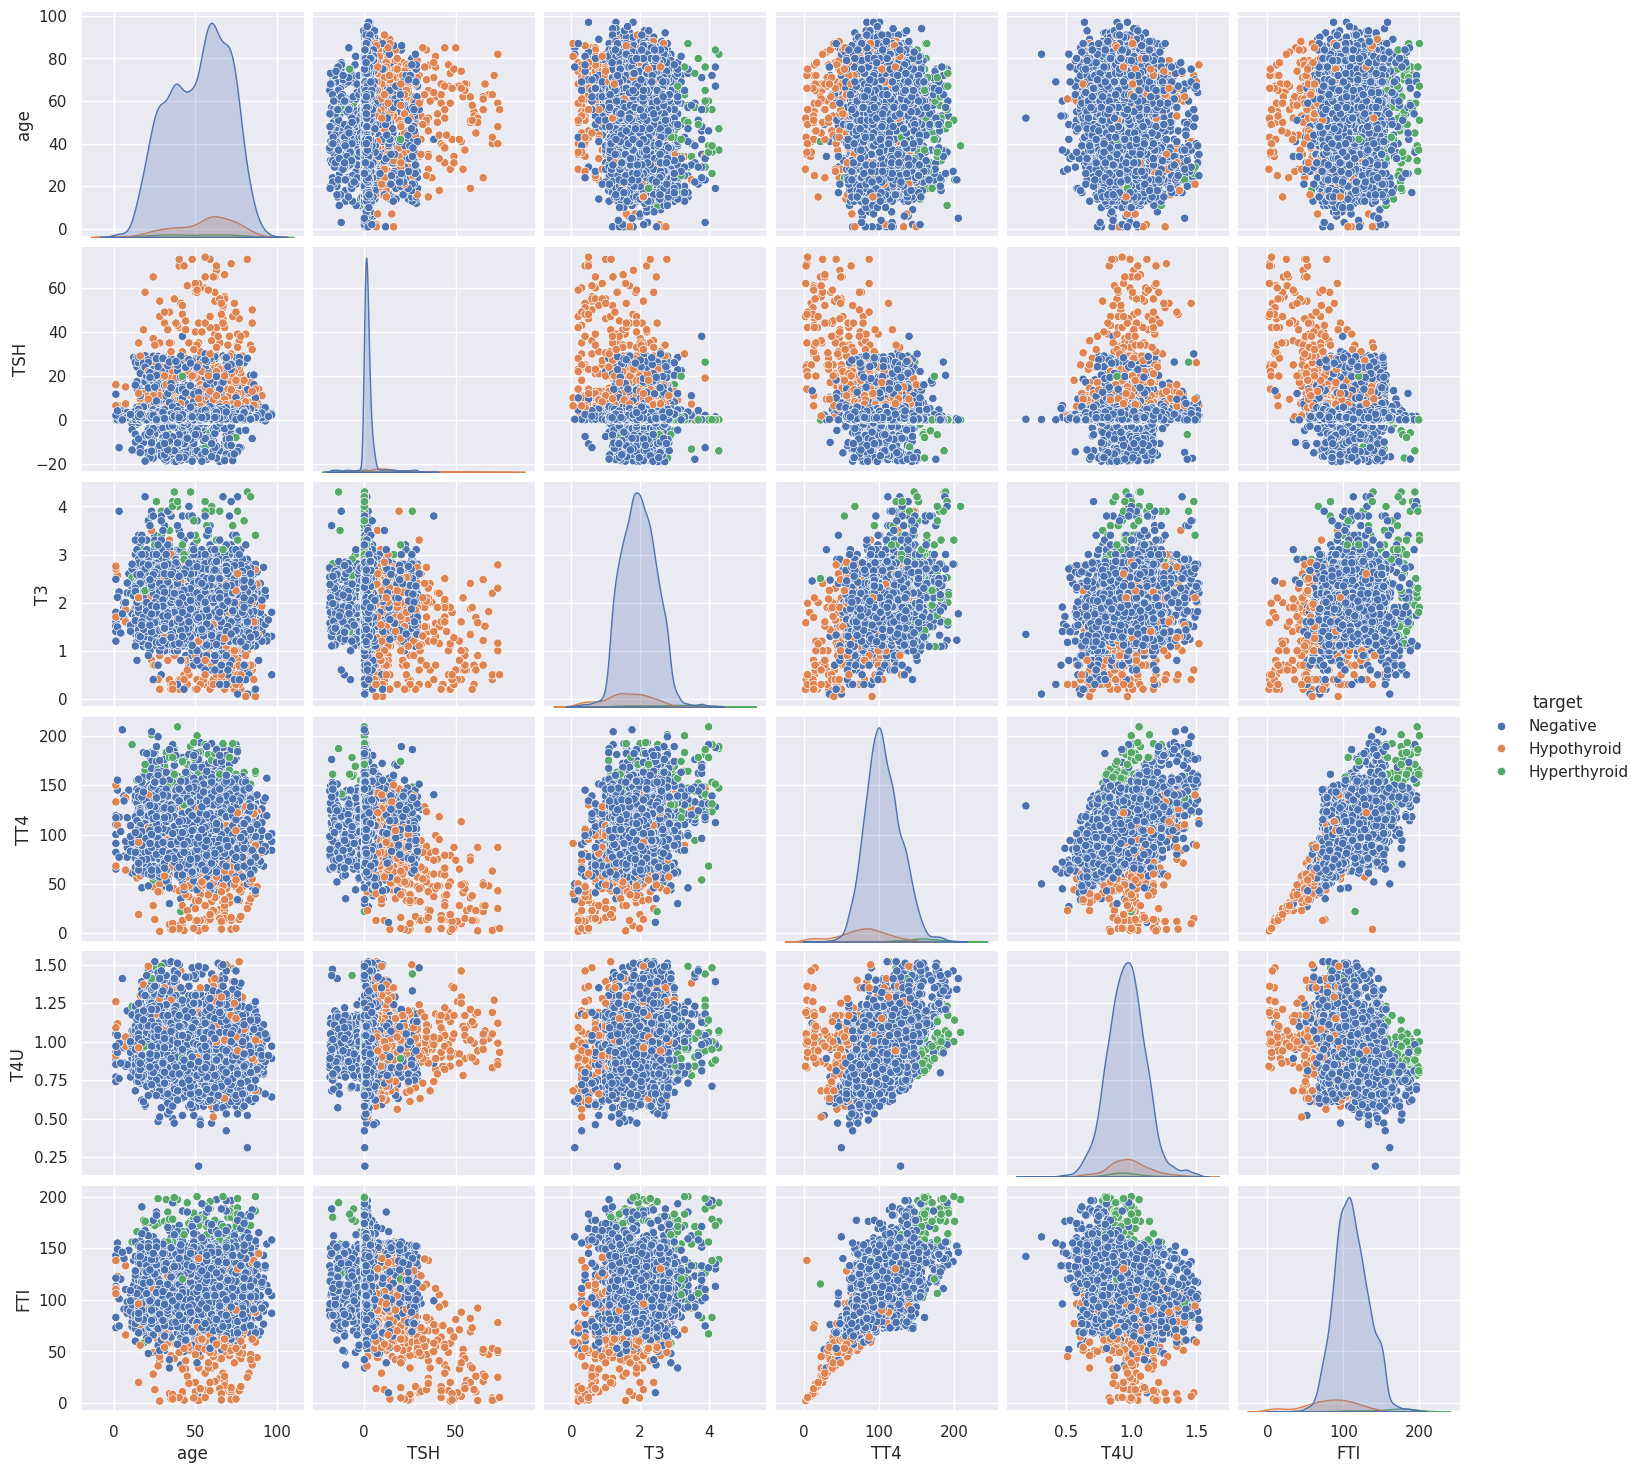

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing numerical and categorical columns including 'target'
sns.set_style('darkgrid')

# Replace 'data' with your actual DataFrame
selected_columns = data.select_dtypes(include=['number']).columns.tolist() + ['target']
sns.pairplot(data[selected_columns], hue='target')

plt.show()


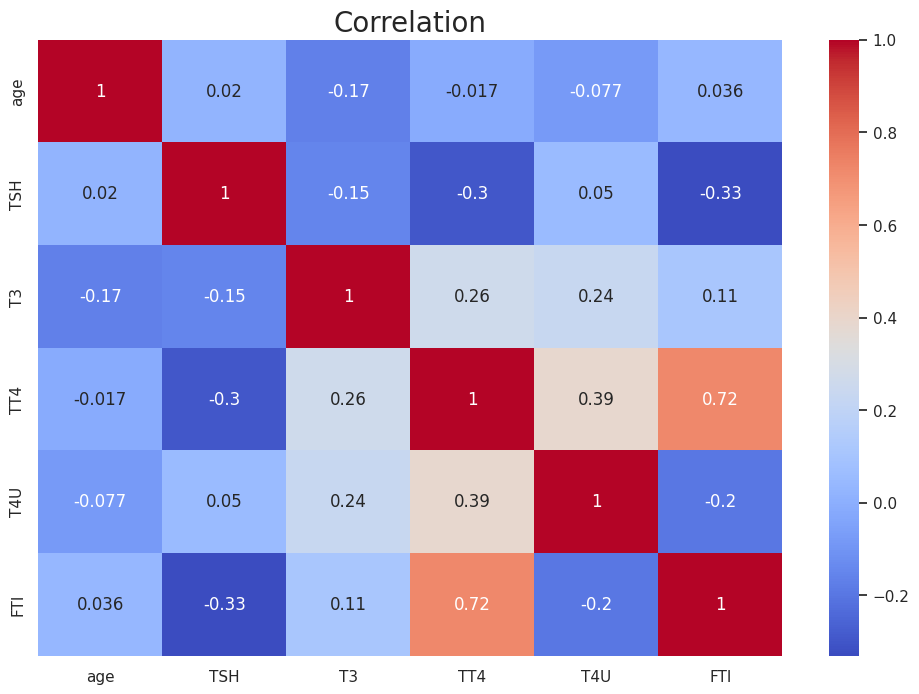

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.select_dtypes(include=['number']).corr(),annot=True,cmap='coolwarm')
plt.title("Correlation",fontsize=20)
plt.show()

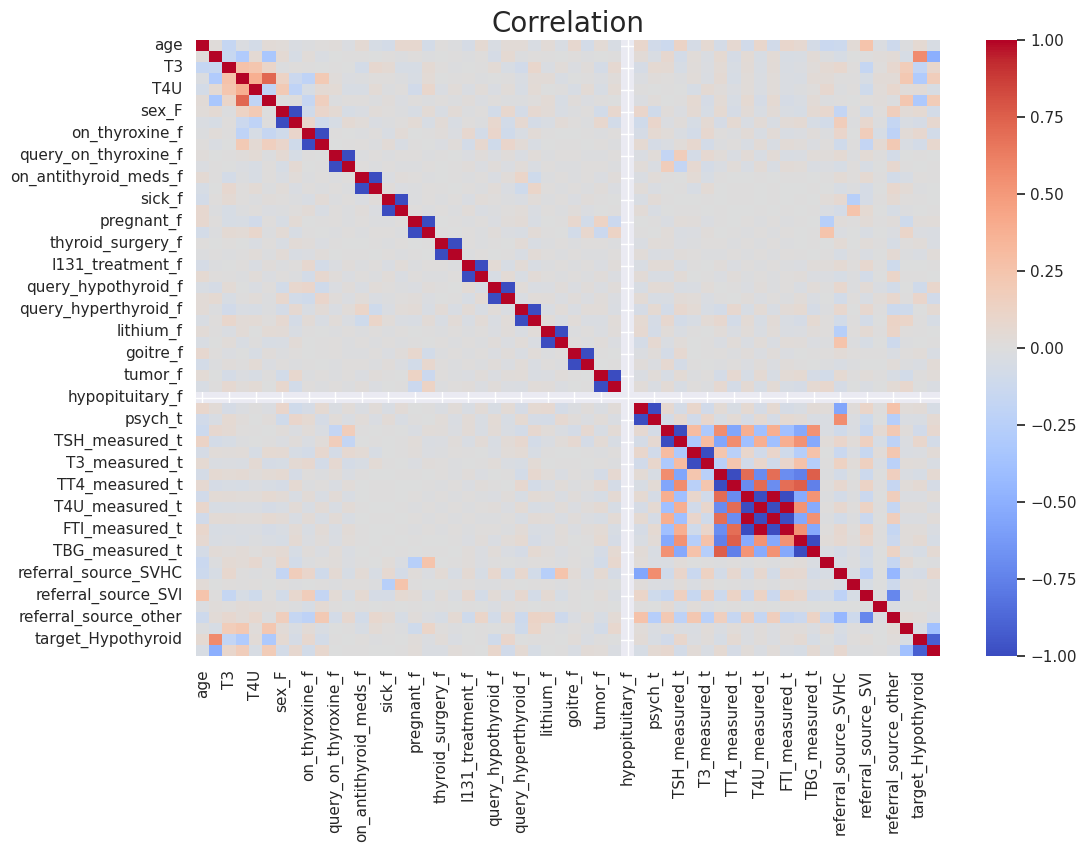

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_encoded = pd.get_dummies(data)

# Create a correlation matrix
correlation_matrix = data_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation", fontsize=20)
plt.show()


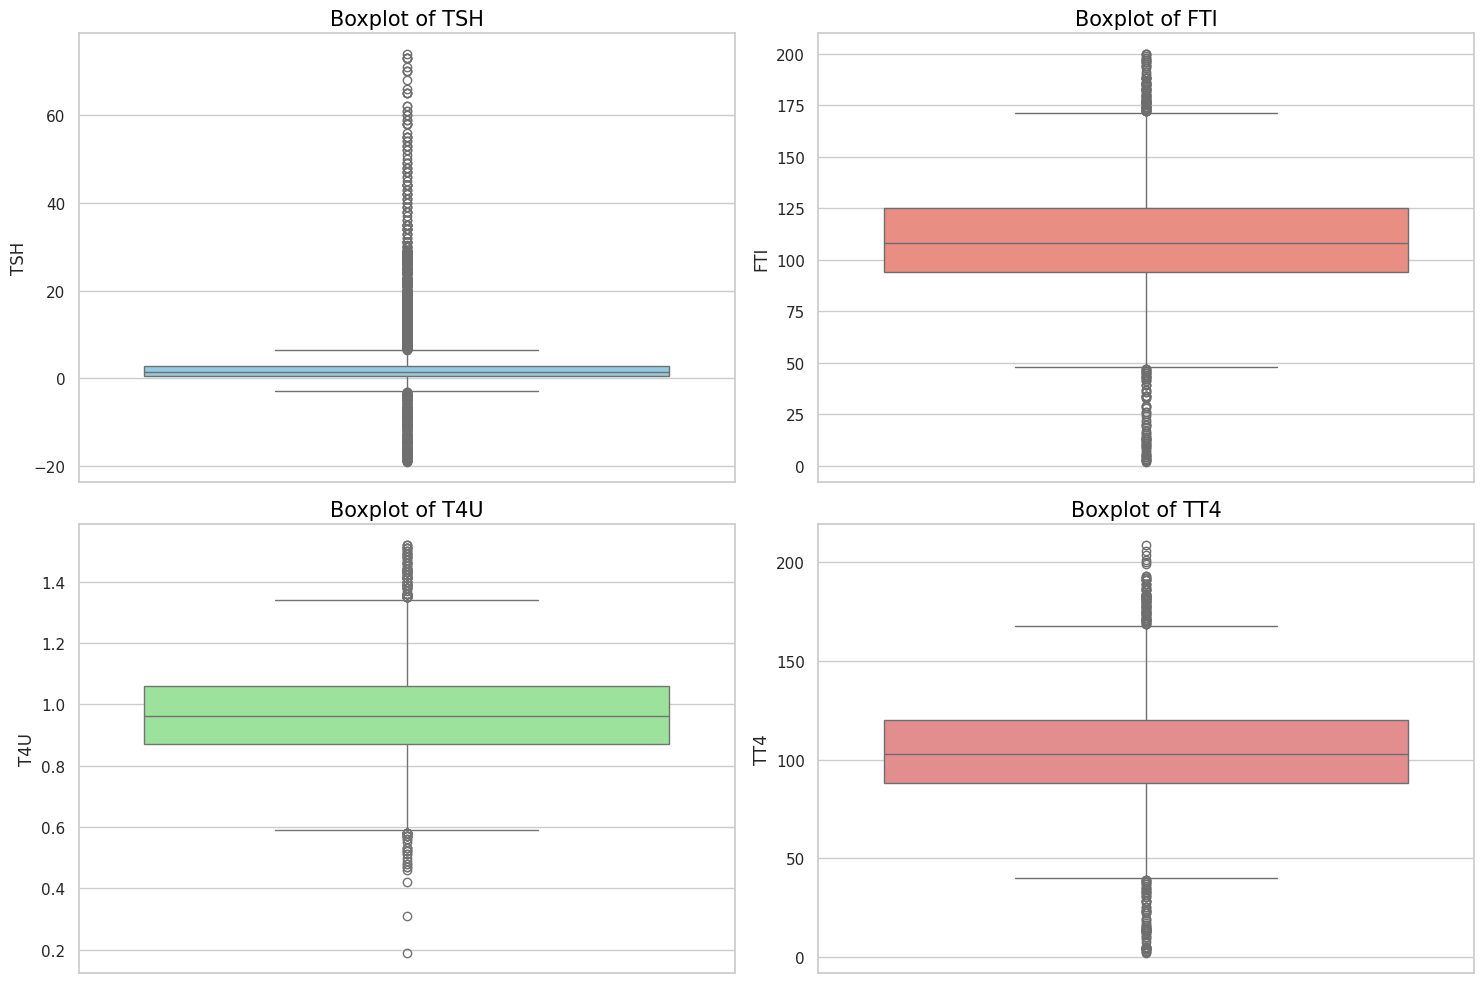

In [ ]:
plt.figure(figsize=(15, 10))
sns.set(style='whitegrid')

plt.subplot(2, 2, 1)
sns.boxplot(data=data, y="TSH", color='skyblue')
plt.title("Boxplot of TSH", fontsize=15, color='black')

plt.subplot(2, 2, 2)
sns.boxplot(data=data, y='FTI', color='salmon')
plt.title("Boxplot of FTI", fontsize=15, color='black')

plt.subplot(2, 2, 3)
sns.boxplot(data=data, y='T4U', color='lightgreen')
plt.title("Boxplot of T4U", fontsize=15, color='black')

plt.subplot(2, 2, 4)
sns.boxplot(data=data, y="TT4", color='lightcoral')
plt.title("Boxplot of TT4", fontsize=15, color='black')

plt.tight_layout()
plt.show()


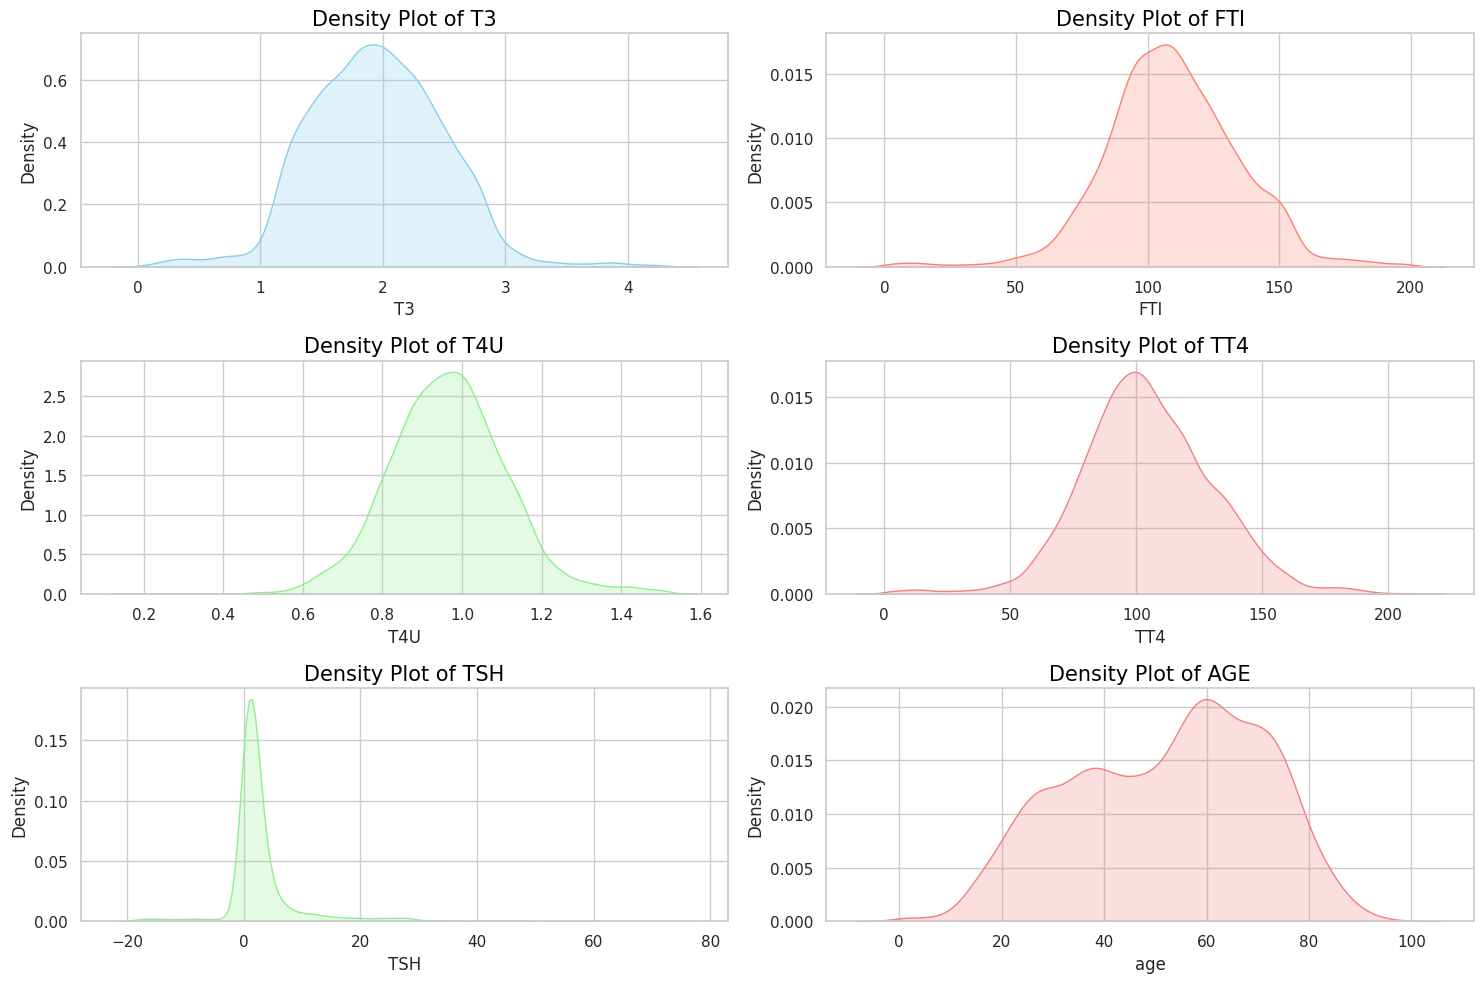

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.set(style='whitegrid')

plt.subplot(3, 2, 1)
sns.kdeplot(data=data, x="T3", color='skyblue', fill=True)
plt.title("Density Plot of T3", fontsize=15, color='black')

plt.subplot(3, 2, 2)
sns.kdeplot(data=data, x='FTI', color='salmon', fill=True)
plt.title("Density Plot of FTI", fontsize=15, color='black')

plt.subplot(3, 2, 3)
sns.kdeplot(data=data, x='T4U', color='lightgreen', fill=True)
plt.title("Density Plot of T4U", fontsize=15, color='black')

plt.subplot(3, 2, 4)
sns.kdeplot(data=data, x="TT4", color='lightcoral', fill=True)
plt.title("Density Plot of TT4", fontsize=15, color='black')

plt.subplot(3, 2, 5)
sns.kdeplot(data=data, x='TSH', color='lightgreen', fill=True)
plt.title("Density Plot of TSH", fontsize=15, color='black')

plt.subplot(3, 2, 6)
sns.kdeplot(data=data, x="age", color='lightcoral', fill=True)
plt.title("Density Plot of AGE", fontsize=15, color='black')
plt.tight_layout()

plt.show()


**Drop Unnecessary Columns**

In [ ]:
selected_columns = ['age','sex', 'TT4', 'T3', 'T4U', 'FTI', 'TSH', 'pregnant', 'target']
data = data[selected_columns]

In [ ]:
data.head(10)

age sex         TT4        T3       T4U         FTI        TSH pregnant  \
0    29   F  129.219635  1.677980  1.071559  131.278993   0.300000        f   
1    29   F  128.000000  1.900000  0.974632  123.778919   1.600000        f   
2    41   F  115.681646  1.516219  1.103839  119.640371  -4.878959        f   
3    36   F   81.525976  1.962457  0.990363  140.375236  16.060242        f   
5    60   F   78.558948  2.852502  0.842965  121.466262   4.204245        f   
6    77   F  141.494745  2.196283  1.126452  151.213820  -5.101932        f   
7    28   F  116.000000  2.600000  0.833015  142.516530   0.700000        f   
8    28   F   76.000000  1.800000  0.812629  103.676258   1.200000        f   
9    28   F   83.000000  1.700000  0.951034  136.394332   1.900000        f   
10   54   F  133.000000  2.300000  1.037120   96.686876   1.900000        f   

      target  
0   Negative  
1   Negative  
2   Negative  
3   Negative  
5   Negative  
6   Negative  
7   Negative  
8   Negative  
9   Negative  
10  Negative

**Convert Categorical data to numerical**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['target']=le.fit_transform(data['target'])
data['sex']=le.fit_transform(data['sex'])
data['pregnant']=le.fit_transform(data['pregnant'])
data.head(10)

age  sex         TT4        T3       T4U         FTI        TSH  pregnant  \
0    29    0  129.219635  1.677980  1.071559  131.278993   0.300000         0   
1    29    0  128.000000  1.900000  0.974632  123.778919   1.600000         0   
2    41    0  115.681646  1.516219  1.103839  119.640371  -4.878959         0   
3    36    0   81.525976  1.962457  0.990363  140.375236  16.060242         0   
5    60    0   78.558948  2.852502  0.842965  121.466262   4.204245         0   
6    77    0  141.494745  2.196283  1.126452  151.213820  -5.101932         0   
7    28    0  116.000000  2.600000  0.833015  142.516530   0.700000         0   
8    28    0   76.000000  1.800000  0.812629  103.676258   1.200000         0   
9    28    0   83.000000  1.700000  0.951034  136.394332   1.900000         0   
10   54    0  133.000000  2.300000  1.037120   96.686876   1.900000         0   

    target  
0        2  
1        2  
2        2  
3        2  
5        2  
6        2  
7        2  
8        2  
9        2  
10       2

In [ ]:
print('Size of data frame after convert numeric data set :',data.shape)
print('Rows :',data.shape[0])
print('Columns :',data.shape[1])

Size of data frame after convert numeric data set : (7131, 9)
Rows : 7131
Columns : 9


#### **Training And Testing Sets For Machine Learning**

In [ ]:
y = data[['target']] # Depended
x = data[['age','sex', 'TT4', 'T3', 'T4U', 'FTI', 'TSH', 'pregnant']] # independent

In [ ]:
y.value_counts()

target
2         6483
1          547
0          101
Name: count, dtype: int64

In [ ]:
y.head(5)

target
0       2
1       2
2       2
3       2
5       2

In [ ]:
import plotly.express as px

# Assuming data is your DataFrame
fig = px.scatter_3d(data, x='T4U', y='T3', z='TSH', color='target',
                    color_discrete_map={'Hypothyroid': '#4b9546', 'Hyperthyroid': '#F65366', 'Negative': '#3498db'},
                    size='age', opacity=0.7, hover_data=['age', 'target'])

# Set the layout to make it full page
fig.update_layout(width=800, height=800)

# Show the plot
fig.show()


- **Split data into Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
y.value_counts()

target
2         6483
1          547
0          101
Name: count, dtype: int64

In [ ]:
print('Length of Training Set :',len(x_train))
print('Length of Testing Set :',len(x_test))

Length of Training Set : 4991
Length of Testing Set : 2140


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
!pip install catboost

In [9]:
from catboost import CatBoostClassifier

param_grid = {'n_estimators': [100,200,250,300,350,400,500]}
model = CatBoostClassifier(random_state=42)
grid_search = GridSearchCV(model,param_grid,cv=5,scoring='accuracy')
grid_search.fit(x_train,y_train,verbose=False)
print('grid search reasult:')
print('best parameters : ', grid_search.best_params_)
print('best cross-validated accuracy: ',grid_search.best_score_)

grid search reasult:
best parameters :  {'n_estimators': 100}
best cross-validated accuracy:  0.9416666666666668


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_cat = CatBoostClassifier(n_estimators=300, random_state=42, verbose=False)

model_cat.fit(x_train, y_train)

y_pred = model_cat.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
score = model_cat.score(x_train,y_train)

print(f'Accuracy :  {accuracy:.2f}%')
print(f'Precision :  {precision:.2f}%')
print(f'Recall :  {recall:.2f}%')
print(f'F1 score :  {f1:.2f}%')
print(f'score :  {score:.2f}%')

Accuracy :  1.00%
Precision :  1.00%
Recall :  1.00%
F1 score :  1.00%
score :  1.00%


In [11]:
from xgboost import XGBClassifier

param_grid = {'n_estimators': [100,200,250,300,350,400,500]}
model = XGBClassifier(random_state=42)
grid_search = GridSearchCV(model,param_grid,cv=5,scoring='accuracy')
grid_search.fit(x_train,y_train,verbose=False)
print('grid search reasult:')
print('best parameters : ', grid_search.best_params_)
print('best cross-validated accuracy: ',grid_search.best_score_)

grid search reasult:
best parameters :  {'n_estimators': 100}
best cross-validated accuracy:  0.9333333333333333


In [12]:
model_xgb = XGBClassifier(n_estimators=500, random_state=42, verbose=False)

model_xgb.fit(x_train, y_train)

y_pred = model_xgb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
score = model_xgb.score(x_train,y_train)

print(f'Accuracy :  {accuracy:.2f}%')
print(f'Precision :  {precision:.2f}%')
print(f'Recall :  {recall:.2f}%')
print(f'F1 score :  {f1:.2f}%')
print(f'score :  {score:.2f}%')

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:22:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy :  1.00%
Precision :  1.00%
Recall :  1.00%
F1 score :  1.00%
score :  1.00%


In [15]:
knn.score(x_test,y_test)

1.0

In [16]:
from sklearn.metrics import mean_squared_error

#Predicted On The Test Set
y_pred= model_cat.predict(x_test)

# Evaluate The Model
Training_score  = model_cat.score(x_train,y_train)
Testing_score  = model_cat.score(x_test,y_test)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = len(y_test)
p = x_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print('Training Score :', Training_score, '%')
print('Testing Score :', Testing_score, '%')
print('Mean Squared Error (MSE) :', mse)
print('Root Mean Squared Error (RMSE) :', rmse)
print('R-squared (R2) :', r2)
print('Adjusted R-squared :', adj_r2)

Training Score : 1.0 %
Testing Score : 1.0 %
Mean Squared Error (MSE) : 0.0
Root Mean Squared Error (RMSE) : 0.0
R-squared (R2) : 1.0
Adjusted R-squared : 1.0


In [17]:
from sklearn.metrics import mean_squared_error

#Predicted On The Test Set
y_pred= model_xgb.predict(x_test)

# Evaluate The Model
Training_score  = model_xgb.score(x_train,y_train)
Testing_score  = model_xgb.score(x_test,y_test)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = len(y_test)
p = x_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print('Training Score :', Training_score, '%')
print('Testing Score :', Testing_score, '%')
print('Mean Squared Error (MSE) :', mse)
print('Root Mean Squared Error (RMSE) :', rmse)
print('R-squared (R2) :', r2)
print('Adjusted R-squared :', adj_r2)

Training Score : 1.0 %
Testing Score : 1.0 %
Mean Squared Error (MSE) : 0.0
Root Mean Squared Error (RMSE) : 0.0
R-squared (R2) : 1.0
Adjusted R-squared : 1.0


In [18]:
r = knn.predict(x_test)
r[1]

np.int64(0)

**Confusion Metrix Visual**

In [19]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)

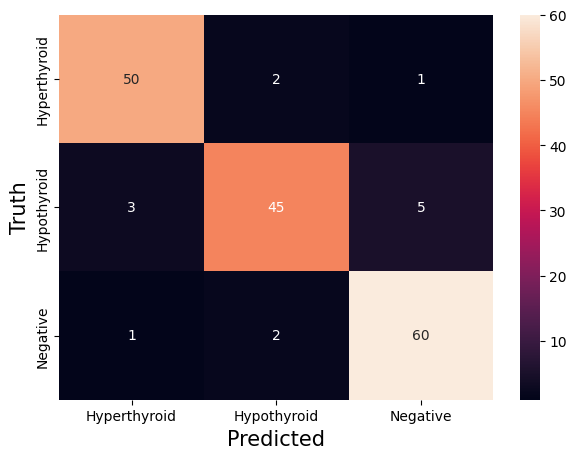

In [22]:
# confusion metric visual
import seaborn as sn
plt.figure(figsize=(7,5))
cm_df = pd.DataFrame(cm,
                     index = ['Hyperthyroid','Hypothyroid','Negative'],
                     columns = ['Hyperthyroid','Hypothyroid','Negative'])
sn.heatmap(cm_df,annot=True)

plt.xlabel('Predicted',color='black',size=15)
plt.ylabel('Truth',color='black',size=15)
plt.show()

KNN:
Training Score: 0.9666666666666667
Testing Score: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
Accuracy: 1.0



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:27:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


xgboost:
Training Score: 1.0
Testing Score: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
Accuracy: 1.0

catboost:
Training Score: 1.0
Testing Score: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
Accuracy: 1.0



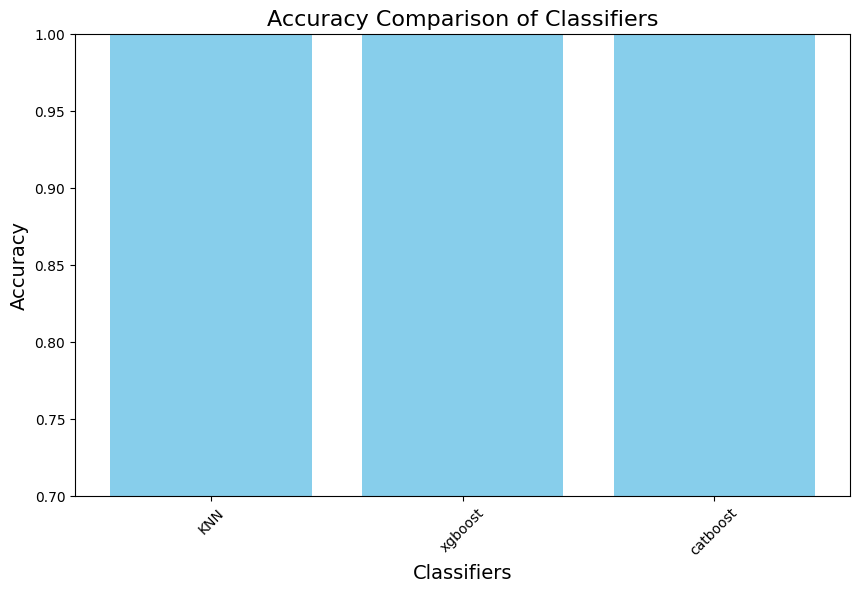

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Initialize KNN with 5 neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
xgb = XGBClassifier(n_estimators=500, random_state=42, verbose=False)
cat = CatBoostClassifier(n_estimators=300, random_state=42, verbose=False)

# Initialize classifiers
classifiers = {
    "KNN": knn,
    "xgboost": xgb,
    "catboost": cat
}

# Evaluate other classifiers
for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    training_score = clf.score(x_train, y_train)
    testing_score = clf.score(x_test, y_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}:")
    print("Training Score:", training_score)
    print("Testing Score:", testing_score)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)
    print("Accuracy:", accuracy)
    print()

# Accuracy comparison graph
accuracies = [clf.score(x_test, y_test) for clf in classifiers.values()]
plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), accuracies, color='skyblue')
plt.xlabel('Classifiers', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy Comparison of Classifiers', fontsize=16)
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.show()

In [24]:
r = xgb.predict(x_test)
r[1]

np.int64(0)

In [25]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)

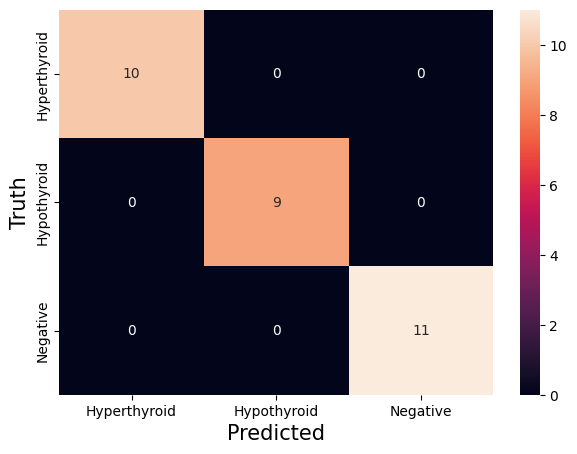

In [26]:
# confusion metric visual
import seaborn as sn
plt.figure(figsize=(7,5))
cm_df = pd.DataFrame(cm,
                     index = ['Hyperthyroid','Hypothyroid','Negative'],
                     columns = ['Hyperthyroid','Hypothyroid','Negative'])
sn.heatmap(cm_df,annot=True)

plt.xlabel('Predicted',color='black',size=15)
plt.ylabel('Truth',color='black',size=15)
plt.show()

In [27]:
from sklearn.metrics import classification_report

# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [34]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris()

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column
df['target'] = data.target

# Inspect the columns and data
print(df.columns)
print(df.head())

# Prepare data
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to categorical (one-hot encoding)
y_train_cat = to_categorical(y_train)  # One-hot encoding for categorical targets
y_test_cat = to_categorical(y_test)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer
model.add(Dropout(0.1))  # Dropout for regularization
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dropout(0.1))  # Dropout for regularization
model.add(Dense(3, activation='softmax'))  # Output layer with 3 units (for 3 classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 100
batch_size = 32
history = model.fit(X_train, y_train_cat, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test_cat))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.4045 - loss: 1.1642 - val_accuracy: 0.5111 - val_loss: 1.1495
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5352 - loss: 1.0709 - val_accuracy: 0.4667 - val_loss: 1.0474
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6719 - loss: 1.0142 - val_accuracy: 0.6222 - val_loss: 0.9592
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6833 - loss: 0.9410 - val_accuracy: 0.8222 - val_loss: 0.8804
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7794 - loss: 0.8656 - val_accuracy: 0.8444 - val_loss: 0.8105
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8103 - loss: 0.8200 - val_accuracy: 0.8444 - val_loss: 0.7457
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8065 - loss: 0.7608 - val_accuracy: 0.8444 - val_loss: 0.6869
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7752 - loss: 0.6969 - val_accuracy: 0.8444 - val_loss